In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from itertools import product

from sklearn import tree
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.dummy import DummyRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import root_mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.inspection import permutation_importance


In [2]:
df = pd.read_excel("Dataset_Quitosana_Adsorcao.xlsx") # lê o arquivo excel 

df = df.drop(['Unnamed: 6', "Artigos", "Experimento"], axis=1) # remove colunas desnecessárias

df = pd.get_dummies(df, columns=['Modificação'], dtype=int) # Transforma a coluna "Modificação" (categorica) em colunas numéricas 

In [3]:
random_seed = 42

features = ['Concentração Inicial (mg/L)', 'Dose de adsorvente (g/L)', 'pH']
target = ['Remoção (%)']

indices = df.index

train_indices, test_indices = train_test_split(indices, test_size=0.1, random_state = random_seed)

df_train = df.loc[train_indices]
df_test = df.loc[test_indices]

X_train = df_train.reindex(features, axis=1).values
y_train = df_train.reindex(target, axis=1).values
X_test = df_test.reindex(features, axis=1).values
y_test = df_test.reindex(target, axis=1).values

In [4]:
baseline_model = DummyRegressor()

linear_model = LinearRegression()

knn_model = KNeighborsRegressor()

dt_model = DecisionTreeRegressor(random_state=random_seed)

rf_model = RandomForestRegressor(random_state=random_seed)

## Baseline Model 

In [5]:
baseline_model.fit(X_train, y_train)

prediction = baseline_model.predict(X_test)

y_true = y_test
y_pred = baseline_model.predict(X_test)

RMSE = root_mean_squared_error(y_true, y_pred)

print(f"The RMSE of the baseline model was {RMSE:.4f} %.")

The RMSE of the baseline model was 25.8532 %.


## Linear Regression Model

In [6]:
linear_model.fit(X_train, y_train)

prediction = linear_model.predict(X_test)

y_true = y_test
y_pred = linear_model.predict(X_test)

RMSE = root_mean_squared_error(y_true, y_pred)

print(f"The RMSE of the linear model was {RMSE:.4f} %.")

The RMSE of the linear model was 22.5667 %.


## K-NN Model

In [7]:
knn_model.fit(X_train, y_train)

prediction = knn_model.predict(X_test)

y_true = y_test
y_pred = knn_model.predict(X_test)

RMSE = root_mean_squared_error(y_true, y_pred)

print(f"The RMSE of the linear model was {RMSE:.4f} %.")

The RMSE of the linear model was 25.4917 %.


In [40]:
NUM_NEIGHBORS = [1, 2, 3, 5, 10, 100, 110, 115]

for n in NUM_NEIGHBORS:
    knn_model = KNeighborsRegressor(n_neighbors=n)

    knn_model.fit(X_train, y_train)

    y_true = y_test
    y_pred = knn_model.predict(X_test)
    RMSE = root_mean_squared_error(y_true, y_pred)
    print(f"The RMSE of the k-NN model using k={n} was {RMSE:.4f} %.")

The RMSE of the k-NN model using k=1 was 22.2649 %.
The RMSE of the k-NN model using k=2 was 21.5657 %.
The RMSE of the k-NN model using k=3 was 23.5355 %.
The RMSE of the k-NN model using k=5 was 25.4917 %.
The RMSE of the k-NN model using k=10 was 24.8906 %.
The RMSE of the k-NN model using k=100 was 25.7116 %.
The RMSE of the k-NN model using k=110 was 25.9293 %.
The RMSE of the k-NN model using k=115 was 25.9487 %.


In [46]:
# RMSE com 2 vizinhos = 21,5657%

knn_model = KNeighborsRegressor(n_neighbors=2)

## Decision Tree Model

In [10]:
dt_model.fit(X_train, y_train)

prediction = dt_model.predict(X_test)

y_true = y_test
y_pred = dt_model.predict(X_test)

RMSE = root_mean_squared_error(y_true, y_pred)

print(f"The RMSE of the linear model was {RMSE:.4f} %.")

The RMSE of the linear model was 16.5828 %.


In [11]:
# Testando hiperparâmetros 

NUM_LEAF_NODES = [None, 6, 36, 50, 100]
NUM_DEPTH = [None, 3, 10, 20, 50]

for n_leaves, n_depth in product(NUM_LEAF_NODES, NUM_DEPTH):
    dt_model = DecisionTreeRegressor(
        max_leaf_nodes=n_leaves,
        max_depth=n_depth,
        random_state=random_seed,
    )

    dt_model.fit(X_train, y_train)

    y_true = y_test
    y_pred = dt_model.predict(X_test)
    RMSE = root_mean_squared_error(y_true, y_pred)

    print(
        f"The RMSE of the DT model using max_leaf_nodes={n_leaves} "
        f"and max_depth={n_depth} was {RMSE:.4f} %."
    )

The RMSE of the DT model using max_leaf_nodes=None and max_depth=None was 16.5828 %.
The RMSE of the DT model using max_leaf_nodes=None and max_depth=3 was 19.9118 %.
The RMSE of the DT model using max_leaf_nodes=None and max_depth=10 was 16.4997 %.
The RMSE of the DT model using max_leaf_nodes=None and max_depth=20 was 16.5828 %.
The RMSE of the DT model using max_leaf_nodes=None and max_depth=50 was 16.5828 %.
The RMSE of the DT model using max_leaf_nodes=6 and max_depth=None was 19.5604 %.
The RMSE of the DT model using max_leaf_nodes=6 and max_depth=3 was 19.5604 %.
The RMSE of the DT model using max_leaf_nodes=6 and max_depth=10 was 19.5604 %.
The RMSE of the DT model using max_leaf_nodes=6 and max_depth=20 was 19.5604 %.
The RMSE of the DT model using max_leaf_nodes=6 and max_depth=50 was 19.5604 %.
The RMSE of the DT model using max_leaf_nodes=36 and max_depth=None was 15.9841 %.
The RMSE of the DT model using max_leaf_nodes=36 and max_depth=3 was 19.9118 %.
The RMSE of the DT m

In [41]:
# Melhor RMSE: 15,9841%

dt_model = DecisionTreeRegressor(
    max_leaf_nodes=None,
    max_depth=10,
    random_state=random_seed,
    )

## Random Florest Model

In [13]:
y_train = y_train.ravel()
y_test = y_test.ravel()

rf_model.fit(X_train, y_train)

prediction = rf_model.predict(X_test)

y_true = y_test
y_pred = rf_model.predict(X_test)

RMSE = root_mean_squared_error(y_true, y_pred)

print(f"The RMSE of the linear model was {RMSE:.4f} %.")

The RMSE of the linear model was 18.2518 %.


In [32]:
# Testando hiperparametros

NUM_TREES = [5, 10, 100, 300, 350]
NUM_LEAF_NODES = [None, 6]
NUM_DEPTH = [None, 3]

for n_leaves, n_depth, n_trees in product(
    NUM_LEAF_NODES, NUM_DEPTH, NUM_TREES
):
    rf_model = RandomForestRegressor(
        n_estimators=n_trees,
        max_leaf_nodes=n_leaves,
        max_depth=n_depth,
        random_state=random_seed,
        n_jobs=4,
    )

    rf_model.fit(X_train, y_train)

    y_true = y_test
    y_pred = rf_model.predict(X_test)
    RMSE = root_mean_squared_error(y_true, y_pred)

    print(
        f"The RMSE of the RF model using "
        f"n_estimators={n_trees} max_leaf_nodes={n_leaves} "
        f"and max_depth={n_depth} was {RMSE:.4f} %."
    )

The RMSE of the RF model using n_estimators=5 max_leaf_nodes=None and max_depth=None was 19.0045 %.
The RMSE of the RF model using n_estimators=10 max_leaf_nodes=None and max_depth=None was 20.9060 %.
The RMSE of the RF model using n_estimators=100 max_leaf_nodes=None and max_depth=None was 18.2518 %.
The RMSE of the RF model using n_estimators=300 max_leaf_nodes=None and max_depth=None was 18.1257 %.
The RMSE of the RF model using n_estimators=350 max_leaf_nodes=None and max_depth=None was 18.1848 %.
The RMSE of the RF model using n_estimators=5 max_leaf_nodes=None and max_depth=3 was 21.5069 %.
The RMSE of the RF model using n_estimators=10 max_leaf_nodes=None and max_depth=3 was 25.4044 %.
The RMSE of the RF model using n_estimators=100 max_leaf_nodes=None and max_depth=3 was 24.4020 %.
The RMSE of the RF model using n_estimators=300 max_leaf_nodes=None and max_depth=3 was 24.3994 %.
The RMSE of the RF model using n_estimators=350 max_leaf_nodes=None and max_depth=3 was 24.4944 %.
T

In [42]:
# Melhor RMSE: 18.1257%
# Treinando modelo com hiperparametros otimizados

rf_model = RandomForestRegressor(
    n_estimators=300,
    random_state=random_seed,
    n_jobs=4,
)

rf_model.fit(X_train, y_train)

y_true = y_test
y_pred = rf_model.predict(X_test)

RMSE = root_mean_squared_error(y_true, y_pred)

print(f"The RMSE of the linear model was {RMSE:.4f} %.")

The RMSE of the linear model was 18.1257 %.


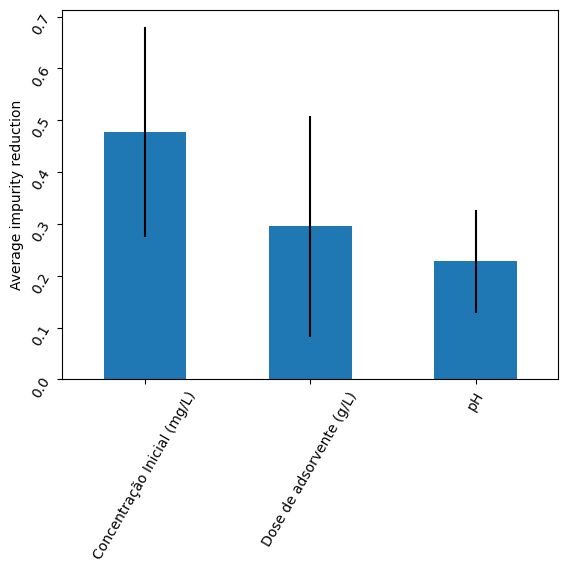

In [16]:
# Verificando importancia das features 

importance = rf_model.feature_importances_
std_dev = np.std([tree.feature_importances_ for tree in rf_model.estimators_], axis=0)

importance_series = pd.Series(importance, index=features)

fig, axe = plt.subplots()
importance_series.plot.bar(yerr=std_dev, ax=axe)
axe.set_ylabel("Average impurity reduction")
axe.tick_params(rotation = 60)
plt.show()

In [17]:

N_REPEATS = 10

def R2_1param(model, x, y):
    """Computes the coefficient of determination when the alternative hypothesis has no linear coefficient."""
    y_pred = model.predict(x).ravel()
    y_true = (np.array(y)).ravel()
    return 1 - sum((y_true - y_pred) ** 2) / sum(y_true**2)

X_local = X_train
y_local = y_train

R2 = R2_1param(rf_model, X_local, y_local)
print(f"The R^2 of the prediction is {R2}")

# Here we calculate the feature importances
r = permutation_importance(
    rf_model,
    X_local,
    y_local,
    n_repeats=N_REPEATS,
    random_state=random_seed,
    scoring=R2_1param,
)

print()

# Here we display the results
for i in r.importances_mean.argsort()[::-1]:
    if r.importances_mean[i] - 2 * r.importances_std[i] > 0:
        print(f"{features[i]:<8}"
              f"{r.importances_mean[i]:.3f}"
              f" +/- {r.importances_std[i]:.3f}")

The R^2 of the prediction is 0.9744525898613816

Concentração Inicial (mg/L)0.104 +/- 0.009
pH      0.054 +/- 0.005
Dose de adsorvente (g/L)0.049 +/- 0.006


# Testando com dados normalizados

In [43]:
scaler_x = MinMaxScaler()
scaler_y = MinMaxScaler()

scaler_x.fit(X_train)
scaler_y.fit(y_train.reshape(-1, 1))

,feature_range,"(0, ...)"
,copy,True
,clip,False


In [44]:
################### MODELO LINEAR

linear_model.fit(
    scaler_x.transform(X_train),
    scaler_y.transform(y_train.reshape(-1, 1)),
)

prediction = linear_model.predict(scaler_x.transform(X_train))
prediction = scaler_y.inverse_transform(prediction)

y_true = y_test
y_pred = linear_model.predict(scaler_x.transform(X_test))
y_pred = scaler_y.inverse_transform(y_pred)

RMSE = root_mean_squared_error(y_true, y_pred)

print(f"The RMSE of the linear model with normalized data was {RMSE:.4f}%.")

The RMSE of the linear model with normalized data was 22.5667%.


In [45]:
################# MODELO K-NN

knn_model.fit(
    scaler_x.transform(X_train),
    scaler_y.transform(y_train.reshape(-1, 1)),
)

# make a prediction using the trained model
prediction = knn_model.predict(scaler_x.transform(X_train))
prediction = scaler_y.inverse_transform(prediction)

y_true = y_test
y_pred = knn_model.predict(scaler_x.transform(X_test))
y_pred = scaler_y.inverse_transform(y_pred)

RMSE = root_mean_squared_error(y_true, y_pred)

print(f"The RMSE of the k-NN model with normalized data was {RMSE:.4f}%.")


The RMSE of the k-NN model with normalized data was 24.8299%.


In [47]:
################# MODELO ARVORE DE DECISÃO

dt_model.fit(
    scaler_x.transform(X_train),
    scaler_y.transform(y_train.reshape(-1, 1)),
)

# make a prediction using the trained model
prediction = dt_model.predict(scaler_x.transform(X_train))
prediction = scaler_y.inverse_transform(prediction.reshape(-1, 1))

y_true = y_test
y_pred = dt_model.predict(scaler_x.transform(X_test))
y_pred = scaler_y.inverse_transform(y_pred.reshape(-1, 1))

RMSE = root_mean_squared_error(y_true, y_pred)

print(f"The RMSE of the decision tree model with normalized data was {RMSE:.4f}%.")

The RMSE of the decision tree model with normalized data was 16.4997%.


In [48]:
################# MODELO FLORESTA ALEATÓRIA

rf_model.fit(
    scaler_x.transform(X_train),
    scaler_y.transform(y_train.reshape(-1, 1)),
)

# make a prediction using the trained model
prediction = rf_model.predict(scaler_x.transform(X_train))
prediction = scaler_y.inverse_transform(prediction.reshape(-1, 1))

y_true = y_test
y_pred = rf_model.predict(scaler_x.transform(X_test))
y_pred = scaler_y.inverse_transform(y_pred.reshape(-1, 1))

RMSE = root_mean_squared_error(y_true, y_pred)

print(f"The RMSE of the random florest tree model with normalized data was {RMSE:.4f}%.")


C:\Users\Ana Clara Brandão\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:1365: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


The RMSE of the random florest tree model with normalized data was 18.3167%.


In [37]:
# Validação cruzada para o modelo K-NN

from sklearn.model_selection import cross_val_score

NUM_FOLDS = 50 # numero de testes-

scores = cross_val_score(
    knn_model,
    scaler_x.transform(X_train),
    scaler_y.transform(y_train.reshape(-1, 1)),
    cv=NUM_FOLDS,
    scoring="neg_root_mean_squared_error"
)

# print("Scores were: ", scores)
# print()
print("Mean score is: ", scaler_y.inverse_transform(scores.mean().reshape(-1, 1)))

Mean score is:  [[-15.97792]]


In [38]:
scores3 = cross_val_score(
    rf_model,
    scaler_x.transform(X_train),
    scaler_y.transform(y_train.reshape(-1, 1)),
    cv=NUM_FOLDS,
    scoring="neg_root_mean_squared_error"
)

# print("Scores were: ", scores2)
# print()
print("Mean score is: ", scaler_y.inverse_transform(scores3.mean().reshape(-1, 1)))

C:\Users\Ana Clara Brandão\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:1365: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\Ana Clara Brandão\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:1365: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\Ana Clara Brandão\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:1365: DataConversionWarning: A column-vector y was passed when a 1d array was exp

Mean score is:  [[-14.34235037]]


In [39]:
# Validação cruzada para o modelo desicion tree

scores2 = cross_val_score(
    dt_model,
    scaler_x.transform(X_train),
    scaler_y.transform(y_train.reshape(-1, 1)),
    cv=NUM_FOLDS,
    scoring="neg_root_mean_squared_error"
)

# print("Scores were: ", scores2)
# print()
print("Mean score is: ", scaler_y.inverse_transform(scores2.mean().reshape(-1, 1)))

Mean score is:  [[-14.4378699]]
